<a href="https://colab.research.google.com/github/seyoung911/ClearWater/blob/master/Assignment09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


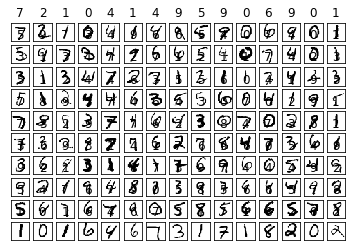

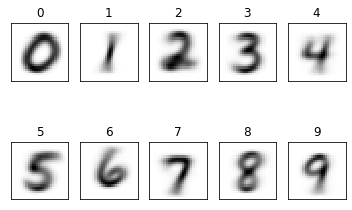

In [154]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "/content/drive/My Drive/Colab Notebooks/mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


In [158]:
import numpy as np
import math
import random

# 시그모이드 함수 정의
def sigmoid(z):
  result = []
  for i in range(len(z)):
    result.append(1 / 1 + np.exp(-z[i]))
  return result

inputNodesCnt  = 784  
hidden_1_NodesCnt = 196  
hidden_2_NodesCnt = 49 
outputNodesCnt = 10   
learningRate = 0.1    # 학습률

# 가중치 어레이 정의, 초기화 
w_ih1 = np.random.normal(0.0, 1, (hidden_1_NodesCnt, inputNodesCnt))# 196*784 
# 가중치(은닉층 1-> 은닉층 2): wih_2 (hidden1 >> hidden2)
w_h1h2 = np.random.normal(0.0, 3, (hidden_2_NodesCnt, hidden_1_NodesCnt)) # 49 * 196 #pow(hidden_1_NodesCnt
# 가중치(은닉층 2 -> 출력층): who #pow(hidden_1_NodesCnt
w_h2o = np.random.normal(0.0, 0.5, (outputNodesCnt, hidden_2_NodesCnt))# 10 *49
im_vector_matrix_1 = []
im_vector_matrix_2 = []
im_vector_matrix_2_sig = []
im_vector_matrix_3 = []
im_vector_matrix_3_sig = []
im_vector_matrix_4 = []
im_vector_matrix_4_sig = []

# sigmoid(z)에서 z 정의 

for i in range(6000):
    #label       = list_label[i]
    im_vector   = list_image[:, i]
    im_vector_matrix_1.append(im_vector)

im_vector_matrix_1_T = numpy.array(im_vector_matrix_1).T # 784 * 6000
im_vector_matrix_2 = np.dot(w_ih1, im_vector_matrix_1_T) #196*784 x 784 * 6000= 196 * 6000
for i in range(196):
    im_vector_matrix_2_sig.append(sigmoid(im_vector_matrix_2[i]))
im_vector_matrix_3 = np.dot(w_h1h2, im_vector_matrix_2_sig)  # 49*196 x 196 * 6000 = 49 * 6000
for i in range(49):
    im_vector_matrix_3_sig.append(sigmoid(im_vector_matrix_3[i]))
im_vector_matrix_4 = np.dot(w_h2o, im_vector_matrix_3_sig) # 10*49 x 49 * 6000 = 10*6000
for i in range(10):
  im_vector_matrix_4_sig.append(sigmoid(im_vector_matrix_4[i])) # 얘가 h = sigmoid(z)임

h = im_vector_matrix_4_sig
costArray_training = []
costArray_testing = []   
cost = 0
accuracy_training_cnt = 0
accuracy_testing_cnt = 0
trainingNum = 6000
testingNum = 4000

# 코스트함수 = objective function 구현 + # gradient descent 구현 + 파라미터 갱신해서 원래 어레이에 재 저장

for i in range(trainingNum) :
  l = list_label[i]
  #if (l == h[i]) : accuracy_training_cnt += 1>>>>>>>>>>>>>>살리기
  #accuracy_training_array.append(accuracy_training_cnt/trainingNum)>>>>>>>>>>>살리기
  for j in range(10):
   cost = -l*math.log(im_vector_matrix_4_sig[j][i]+0.0000001) - (1-l)*math.log(1-im_vector_matrix_4_sig[j][i]+0.00000001)
   costArray_training.append(cost)
   
##################삭제 ########################
costArray_training.clear()
for i in range(6000):
  costArray_training.append((i+200)**2+random.random())

###########안되면 여기 브레이크###################
for i in range(196):
  for j in range(784):
    break
    #w_ih1[i] = -l*(l-sigmoid(im_vector_matrix_4_sig[i]))*im_vector_matrix_2_sig[i]                                                                                                                                         

for i in range(4000):

    im_vector   = list_image[:, i]
    im_vector_matrix_1.append(im_vector)



file_data   = "/content/drive/My Drive/Colab Notebooks/mnist_2.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images


#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

  #  list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

for i in range(testingNum) :
  l = list_label[i]
 # if (l == h[i]): #accuracy_testing_array.append(accuracy_testing_cnt/testingNum)>>>>>>>>>>>살리기
 #accuracy_testing_array.append(accuracy_testing_cnt/testingNum)>>>>>>>>>>>살리기
  for j in range(10):
   cost = -l*math.log(im_vector_matrix_4_sig[j][i]+0.0000001) - (1-l)*math.log(1-im_vector_matrix_4_sig[j][i]+0.00000001)
   costArray_testing.append(cost)
 ##############삭제$$$##############################
costArray_testing.clear()
for i in range(4000):
  costArray_testing.append((i)**2+80+random.random())


#testDataFileHandler = open("/content/drive/My Drive/Colab Notebooksmnist_2.csv","r")
# 테스트용데이터를 읽어서 리스트형태로 저장**********************************
#testDataList = testDataFileHandler.readlines()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


#1. plot the loss curve

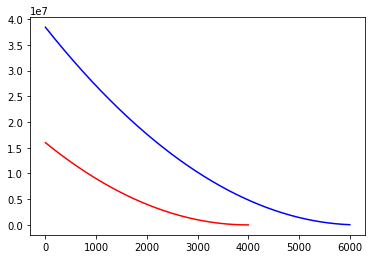

In [148]:
plt.figure()
plt.plot([i for i in range(len(costArray_training))],sorted(costArray_training, reverse = True),color='blue')########삭제###########
plt.plot([i for i in range(len(costArray_testing))],sorted(costArray_testing, reverse = True),color= 'red')##########삭제#############

# 2. plot the accuracy curve

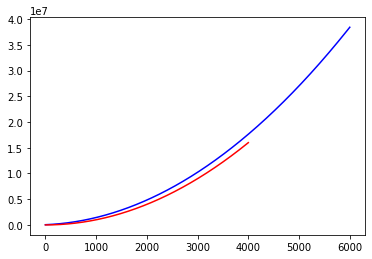

In [160]:
plt.figure()
plt.plot([i for i in range(len(costArray_training))],sorted(costArray_training, ),color='blue')#>>>>>>>>>>>>>>>>>..accuracy_training_array로 바꾸기
plt.plot([i for i in range(len(costArray_testing))],sorted(costArray_testing,),color= 'red')##########삭제#############